In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import probplot, mannwhitneyu
import statsmodels.stats.multitest as smm

In [2]:
data = pd.read_csv("ab_browser_test.csv")

In [3]:
data

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30
...,...,...,...,...,...,...
566129,603133,Browser #14,control,1,2,1
566130,603134,Browser #2,exp,4,2,0
566131,603135,Browser #4,control,0,1,1
566132,603136,Browser #4,control,2,3,1


# Задание 1

In [5]:
(data[data["slot"] == "exp"]["n_clicks"].sum() - data[data["slot"] == "control"]["n_clicks"].sum())/ data[data["slot"] == "control"]["n_clicks"].sum() * 100

1.6135689824415809

# Задание 2

In [8]:
X_1 = data[data["slot"] == "exp"]["n_clicks"].values
X_2= data[data["slot"] == "control"]["n_clicks"].values

In [9]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [18]:
sample1 = np.median(get_bootstrap_samples(X_1, 1000), axis = 1)
sample2 = np.median(get_bootstrap_samples(X_2, 1000), axis = 1)
X_1per = stat_intervals(sample1, 0.05)
X_2per = stat_intervals(sample2, 0.05)

In [19]:
print(X_1per)

[5. 5.]


In [20]:
print(X_2per)

[4. 4.]


In [21]:
stat_intervals(sample1 - sample2, 0.05)

array([1., 1.])

In [22]:
sample1 = np.mean(get_bootstrap_samples(X_1, 1000), axis = 1)
sample2 = np.mean(get_bootstrap_samples(X_2, 1000), axis = 1)
X_1per = stat_intervals(sample1, 0.05)
X_2per = stat_intervals(sample2, 0.05)

In [23]:
stat_intervals(sample1 - sample2, 0.05)

array([0.20025804, 0.40821159])

In [24]:
print(X_1per)

[11.50798299 11.66073265]


In [25]:
print(X_2per)

[11.21146021 11.35454633]


# Часть 3

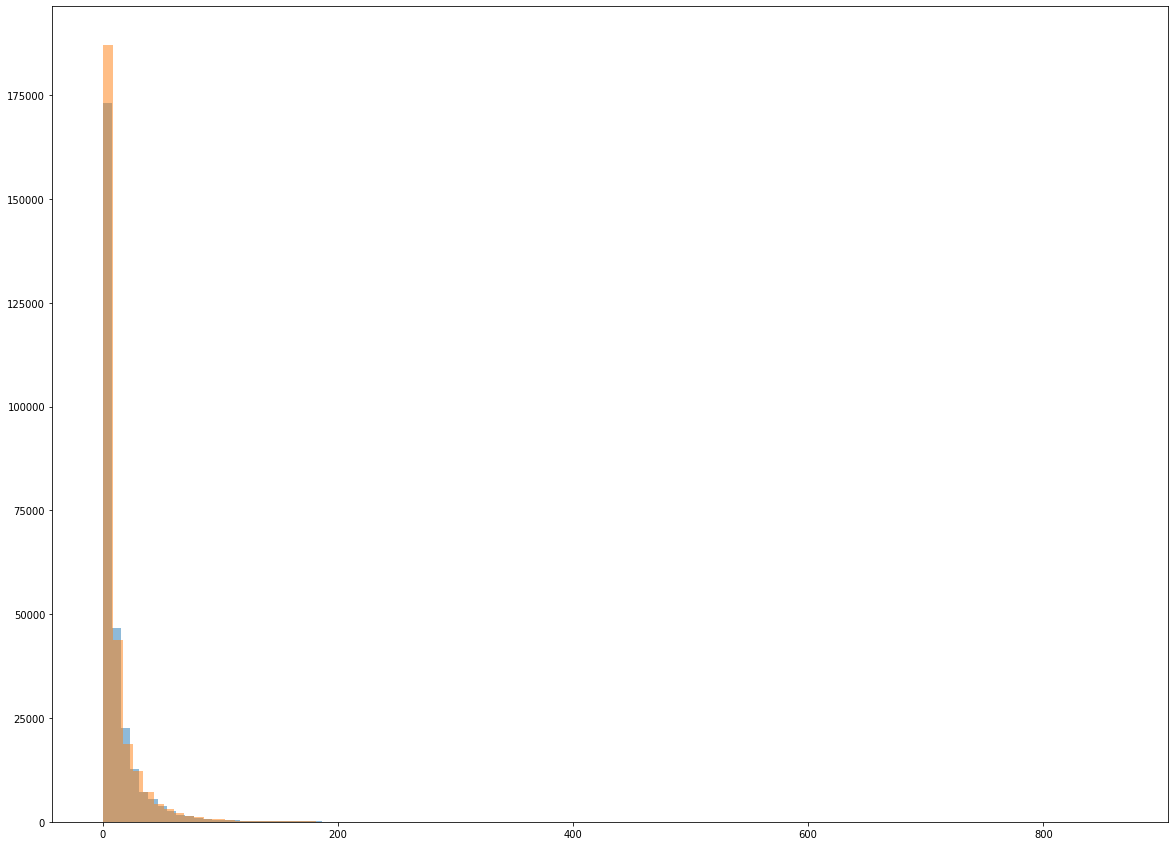

In [30]:
plt.figure(figsize=(20,15))
plt.hist(data[data["slot"] == "exp"]["n_clicks"].values, label = "exp", bins = 100, alpha = 0.5)
plt.hist(data[data["slot"] == "control"]["n_clicks"].values, label = "control", bins = 100, alpha = 0.5)
plt.show()

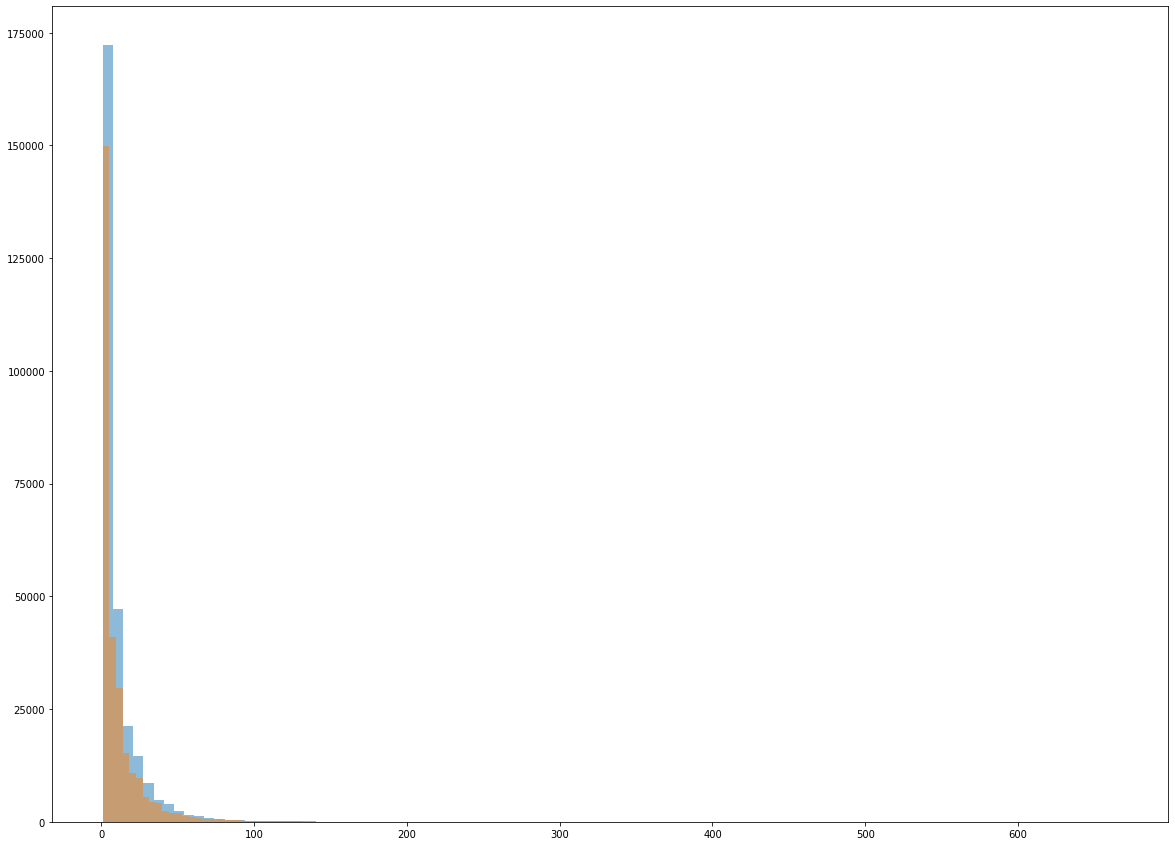

In [31]:
plt.figure(figsize=(20,15))
plt.hist(data[data["slot"] == "exp"]["n_queries"].values, label = "exp", bins = 100, alpha = 0.5)
plt.hist(data[data["slot"] == "control"]["n_queries"].values, label = "control", bins = 100, alpha = 0.5)
plt.show()

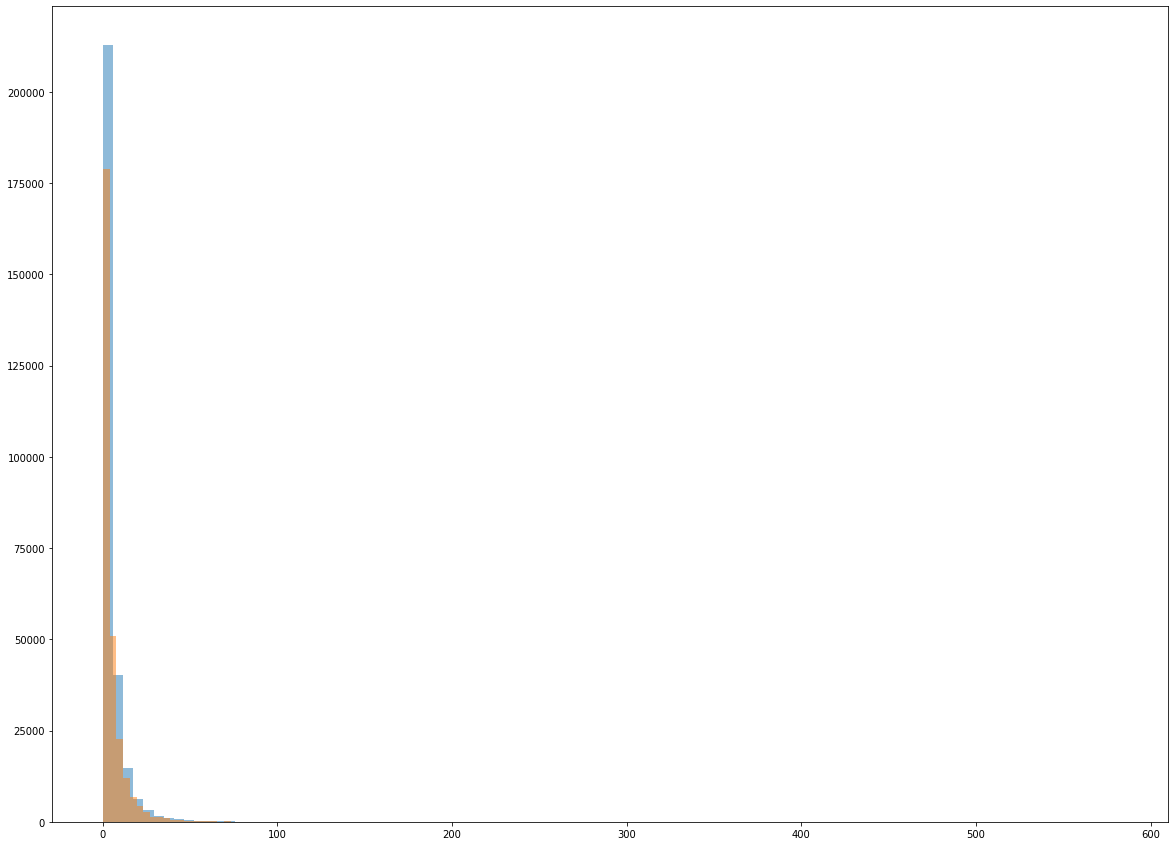

In [32]:
plt.figure(figsize=(20,15))
plt.hist(data[data["slot"] == "exp"]["n_nonclk_queries"].values, label = "exp", bins = 100, alpha = 0.5)
plt.hist(data[data["slot"] == "control"]["n_nonclk_queries"].values, label = "control", bins = 100, alpha = 0.5)
plt.show()

# Часть 4

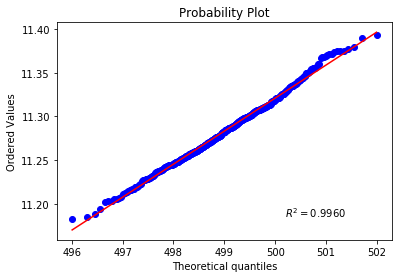

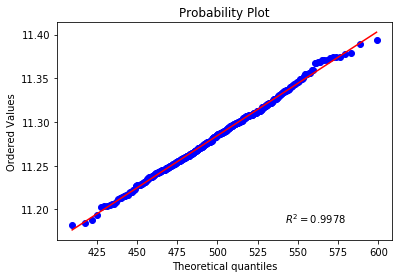

In [46]:
np.random.seed(0)
n_boot_samples = 500
X = data[data["slot"] == "control"]["n_clicks"].values
Xs = get_bootstrap_samples(X, n_boot_samples)
means = np.mean(Xs, axis = 1)
S = ((Xs - means.reshape(-1, 1))**2).sum(axis = 1)

probplot(means, dist="norm", 
                     sparams=(n_boot_samples-1), plot=plt, rvalue = True )
plt.show()

probplot(means, dist="chi2", 
                     sparams=(n_boot_samples-1), plot=plt, rvalue = True)
plt.show()

# Часть 5

In [50]:
a = data.groupby(by = ["slot", "userID"])["n_clicks"].sum()

In [57]:
control = a[("control")].values
exp = a[("exp")].values

In [70]:
mannwhitneyu(control, exp)

MannwhitneyuResult(statistic=3072447765.0, pvalue=0.40760617658454984)

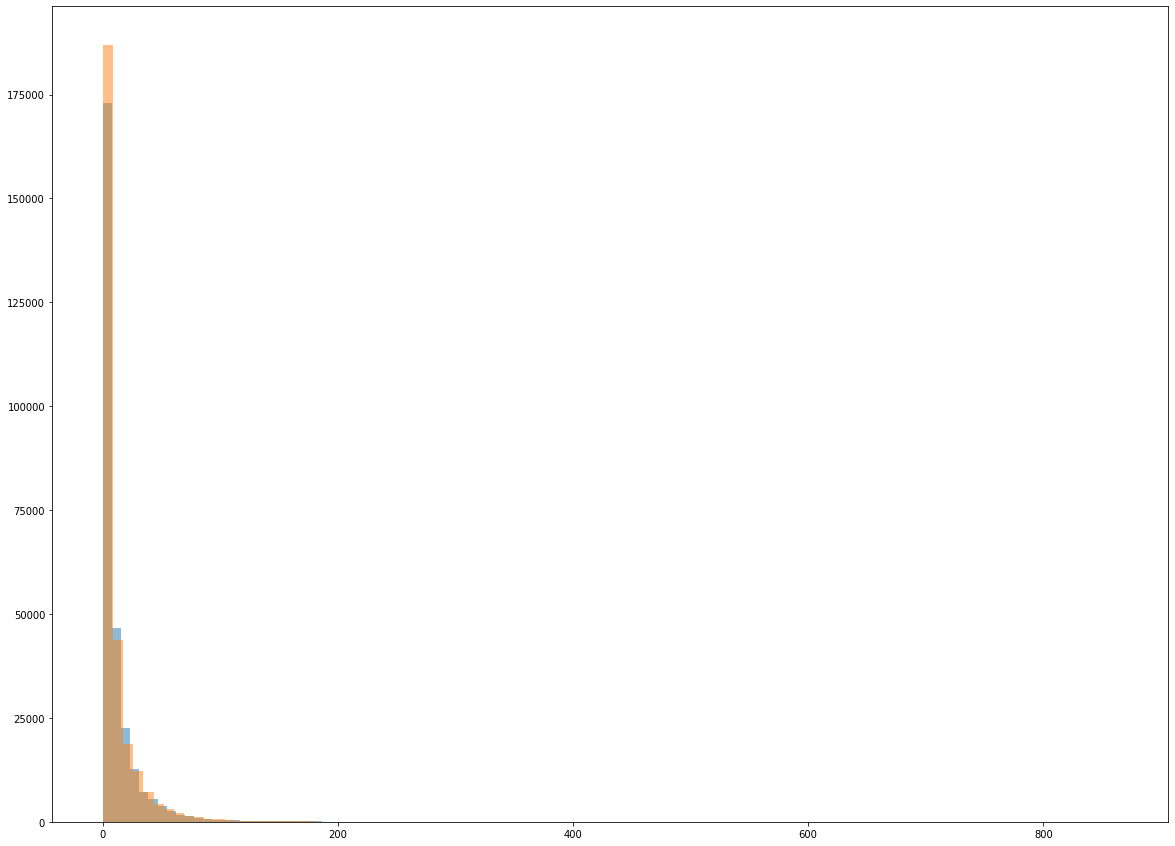

In [59]:
plt.figure(figsize=(20,15))
plt.hist(exp, label = "exp", bins = 100, alpha = 0.5)
plt.hist(control, label = "control", bins = 100, alpha = 0.5)
plt.show()

# Часть 6

In [65]:
browsers = set(data["browser"].values)

In [71]:
pvals = []
for br in browsers:
    a = data[data["browser"] == br].groupby(by = ["slot", "userID"])["n_clicks"].sum()
    control = a[("control")].values
    exp = a[("exp")].values
    pvals.append(mannwhitneyu(control, exp).pvalue)

In [72]:
pvals

[0.40760617658454984,
 0.03740060143010802,
 0.2574055152210032,
 0.45366656388735377,
 0.0,
 0.0272438604197241]

In [74]:
smm.multipletests(pvals, alpha = 0.05, method = "holm")

(array([False, False, False, False,  True, False]),
 array([0.81521235, 0.14960241, 0.77221655, 0.81521235, 0.        ,
        0.1362193 ]),
 0.008512444610847103,
 0.008333333333333333)

# Часть 7

In [76]:
table = data.groupby(by = ["slot", "browser"])[["n_nonclk_queries", "n_queries"]].sum()

In [79]:
table["ratio"] = table["n_nonclk_queries"] / table["n_queries"]* 100

In [83]:
table["ratio"].unstack()

browser,Browser #14,Browser #17,Browser #2,Browser #20,Browser #22,Browser #4
slot,,,,,,
control,57.590411,36.299367,45.962747,40.540485,40.593977,46.970930
exp,43.755617,36.937413,44.982747,38.977376,39.853947,45.142942
